### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [289]:
data = pd.read_csv('data/coupons.csv')

In [290]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [292]:
#describe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [293]:
#Shape of data
data.shape

(12684, 26)

In [294]:
#Review the value of each type
for field in data.columns:
    print("\n")
    print("Value counts")
    print(data[field].value_counts())
    



Value counts
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


Value counts
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


Value counts
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64


Value counts
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


Value counts
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64


Value counts
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


Value counts
expiration
1d    7091
2h    5593
Name: count, dtype: int64


Value counts
gender
Female    6511
Male      6173
Name: count, dtype: int64


Value counts
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1

3. Decide what to do about your missing data -- drop, replace, other...

In [296]:
#Looking at above data, car column seems to have very low values i.e. 108. So will drop this.
# Also, will drop columns toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min
data.drop(columns=['car', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'], inplace=True)

#Drop rows with Nan Values
data.dropna(inplace=True)

print(data.shape)
data.isnull().sum()

(12079, 22)


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [298]:
#Since the value of Y is 1 or 0, we can find the sum on Y column with 1's and divide by total rows
total_rows= data.shape[0]
accepted_coupons_total = data['Y'].sum()
proportion_accepted_coupon= accepted_coupons_total/total_rows
print(f"Propotion of the total observations choose to accept the coupon: {proportion_accepted_coupon:.2f}")

Propotion of the total observations choose to accept the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

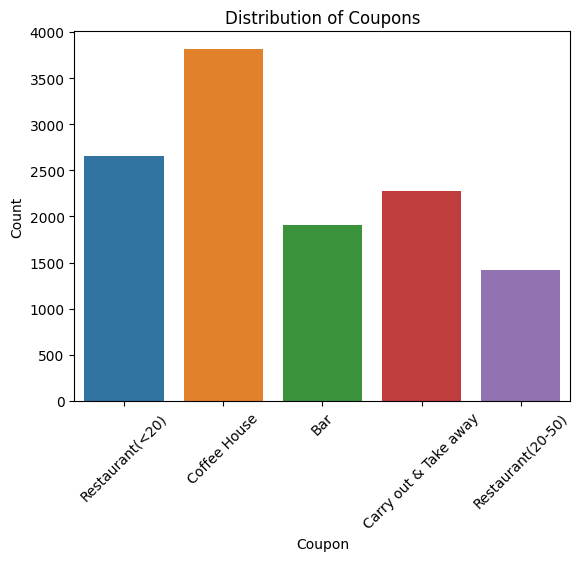

In [300]:
sns.countplot(x='coupon', data= data)
plt.title("Distribution of Coupons")
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

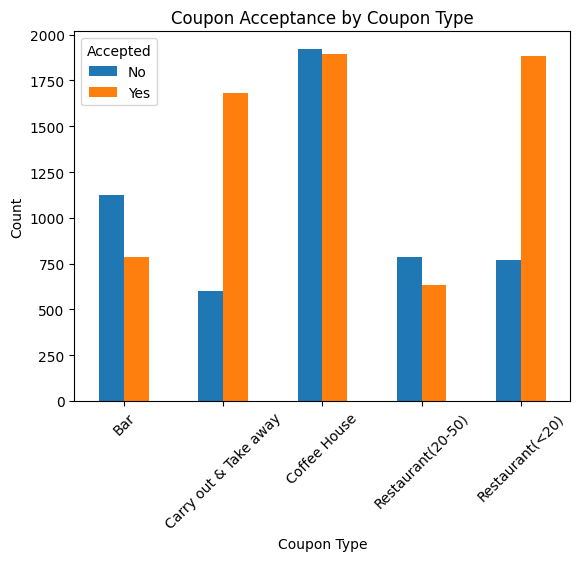

In [301]:
#Lets visualize the coupons with acceptance
coupon_groupedby_data = data.groupby(['coupon', 'Y']).size().unstack()

coupon_groupedby_data.plot(kind='bar')
plt.title('Coupon Acceptance by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.show()

6. Use a histogram to visualize the temperature column.

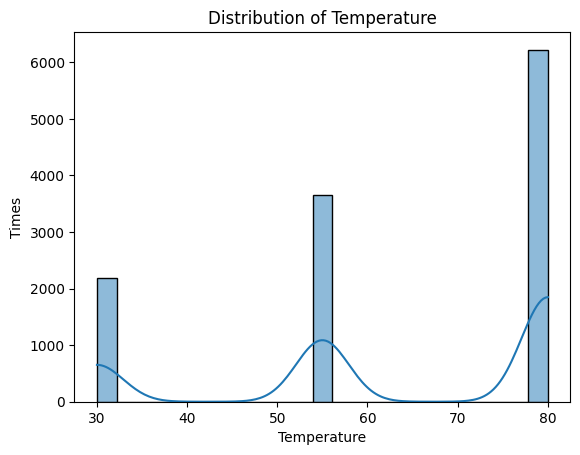

In [303]:
sns.histplot(data= data, x='temperature', kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Times')
plt.show()

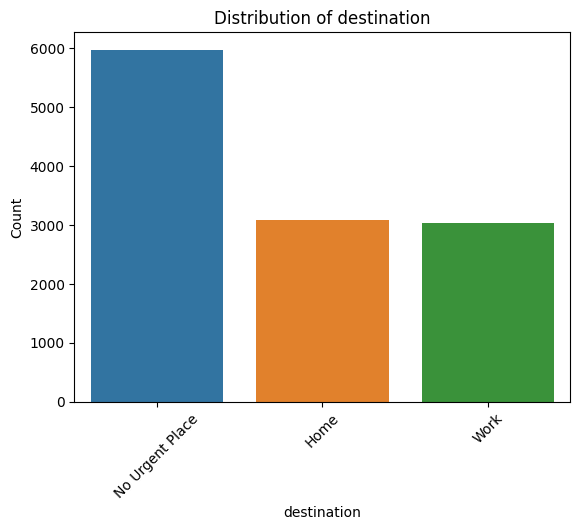

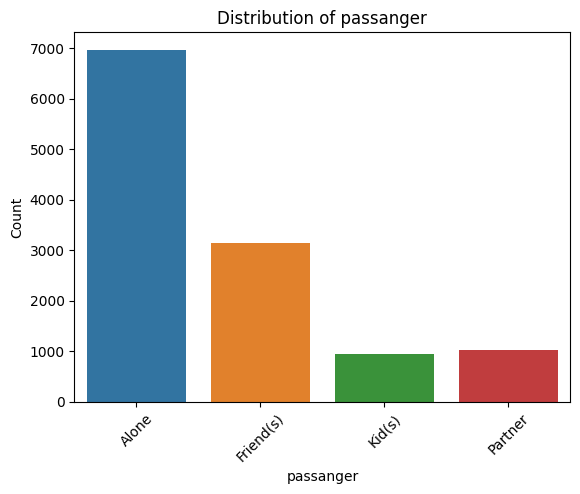

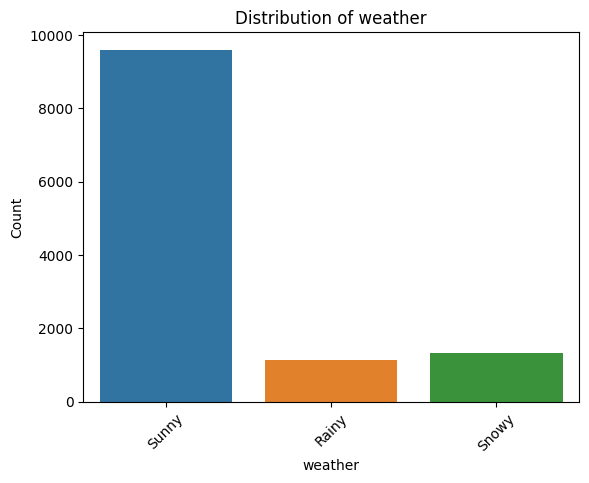

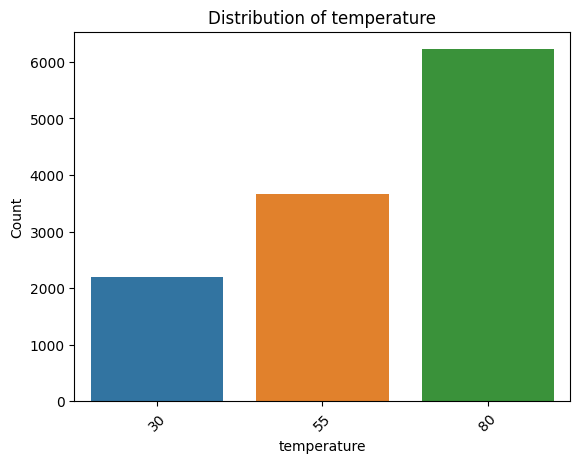

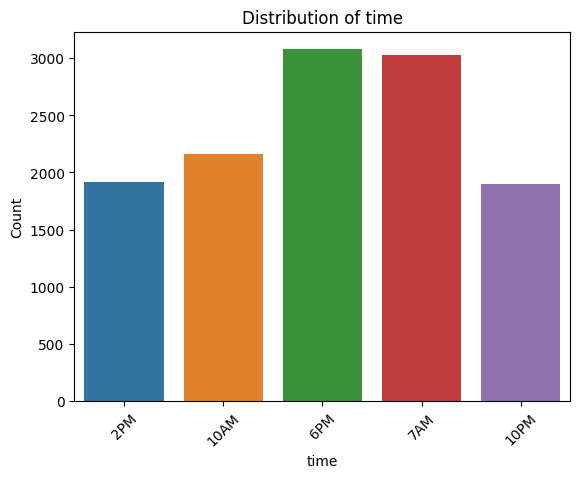

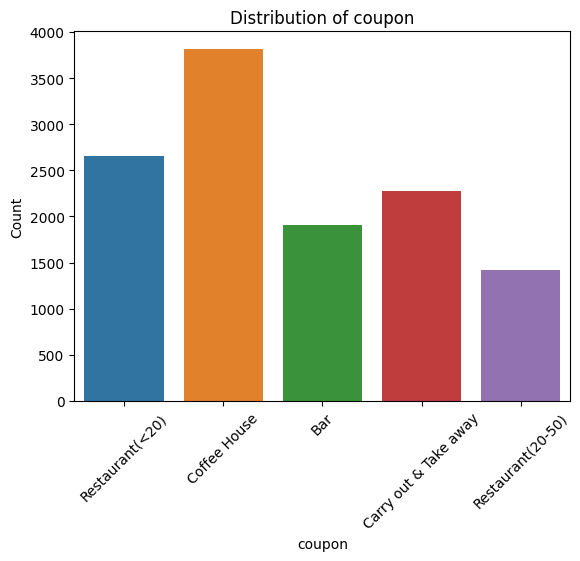

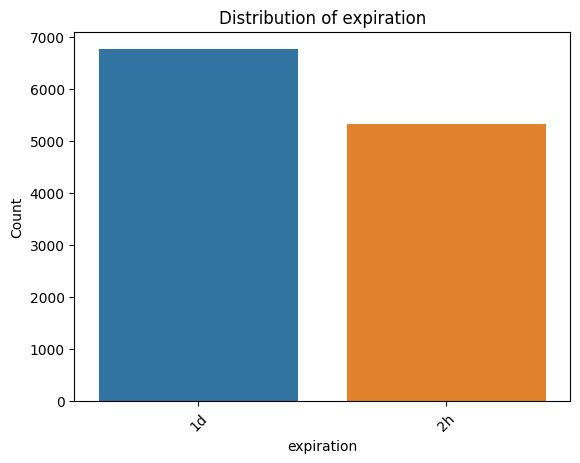

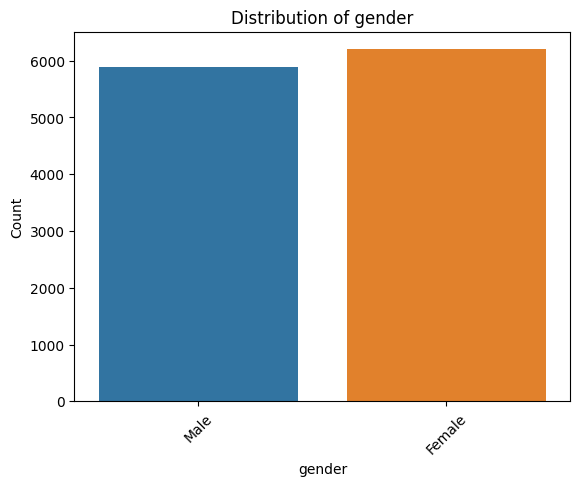

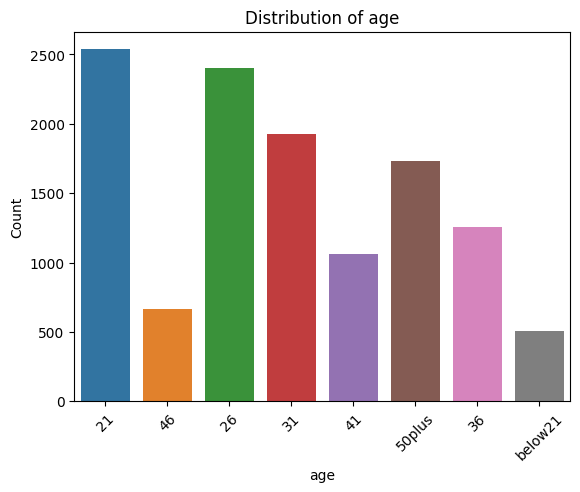

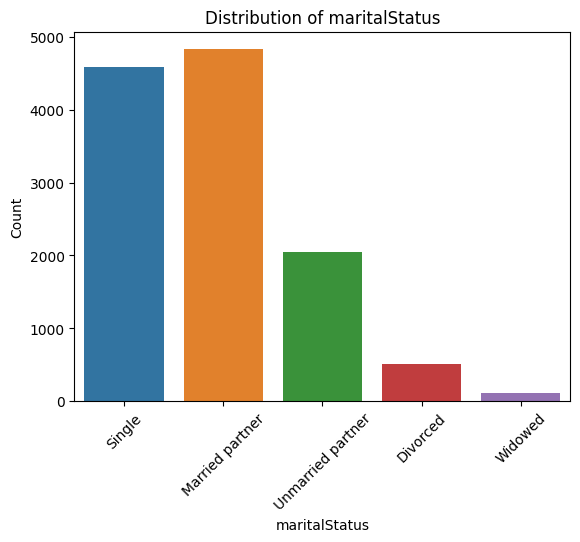

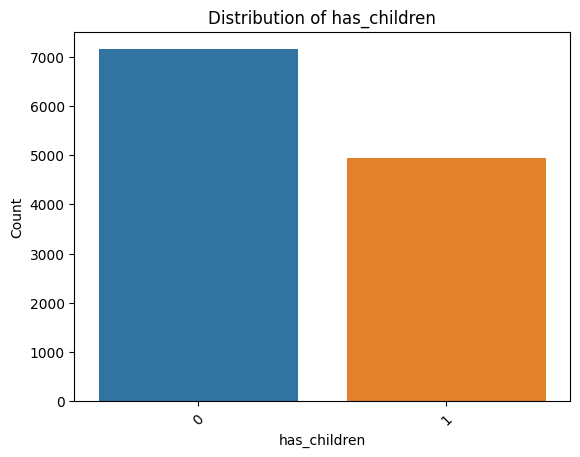

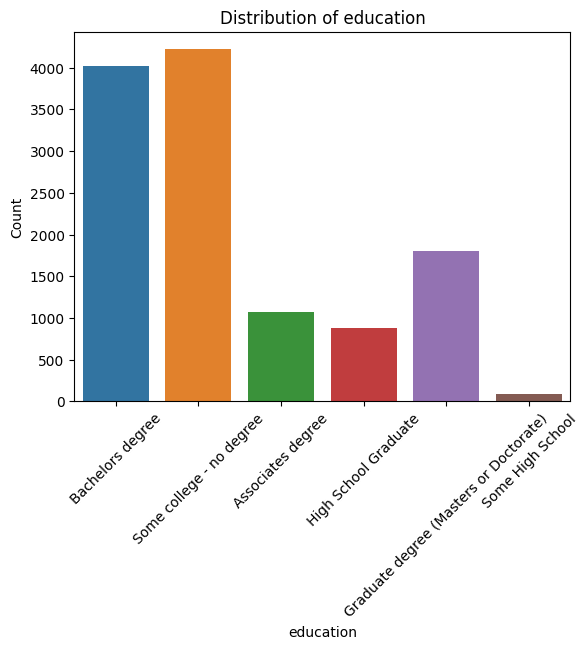

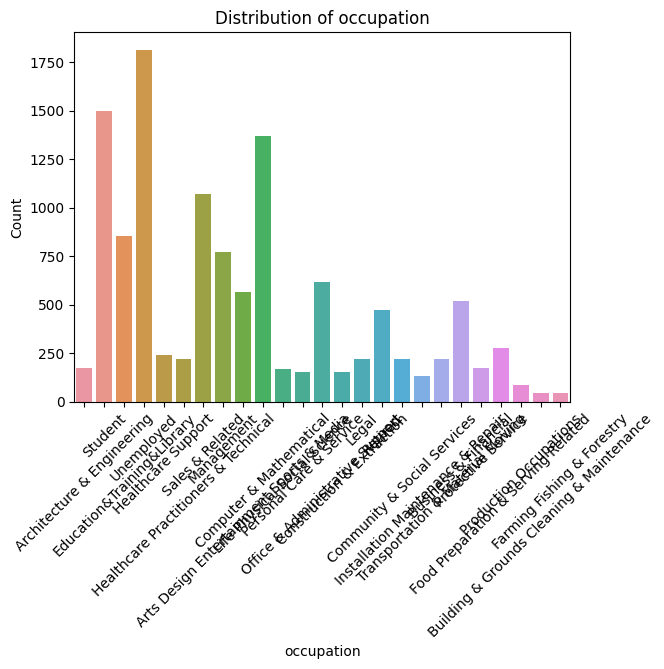

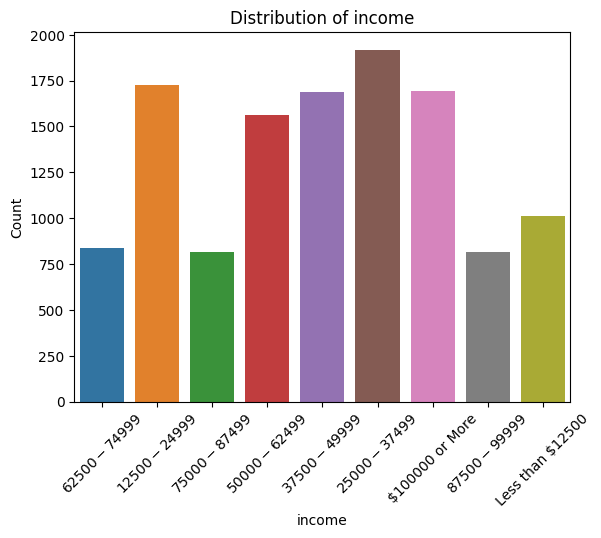

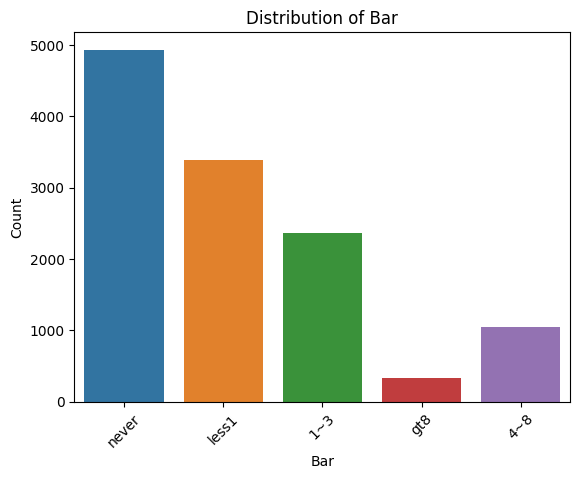

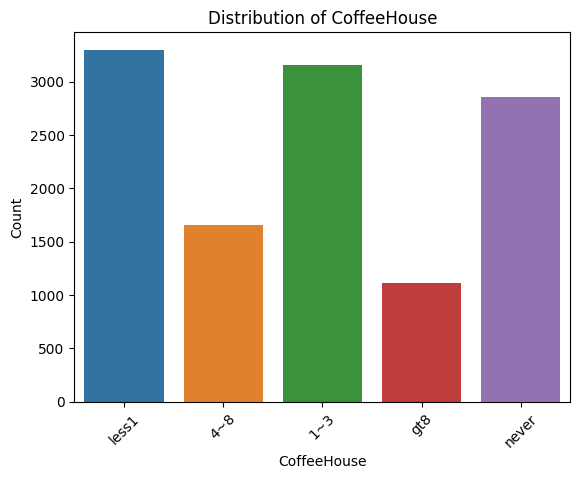

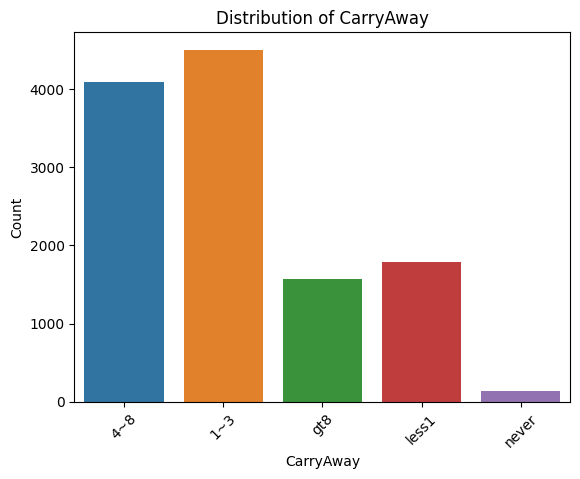

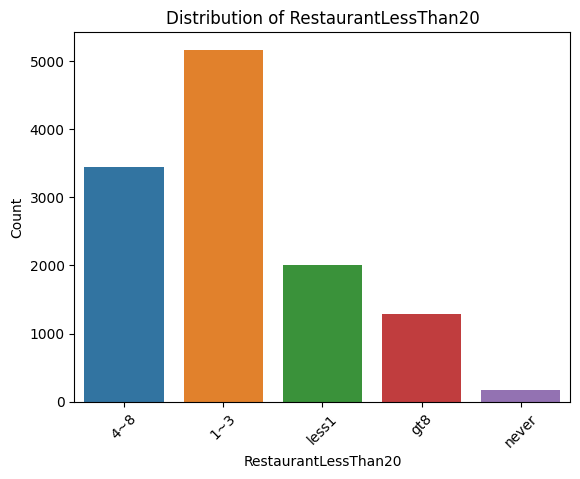

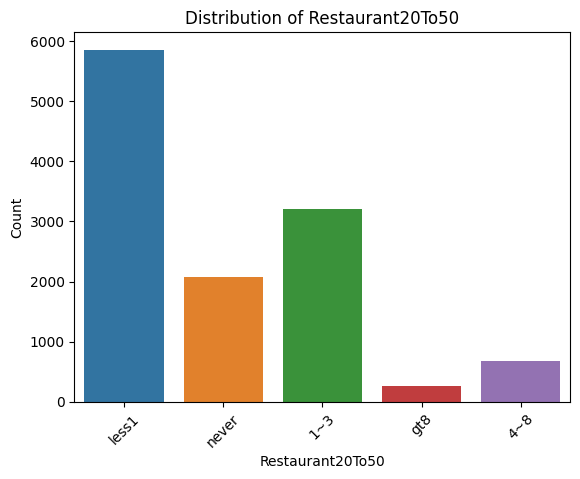

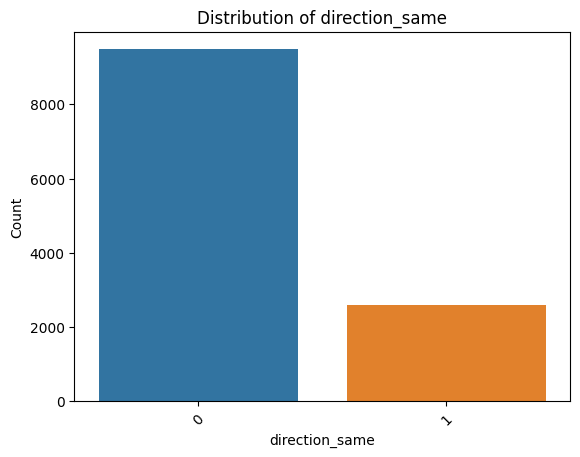

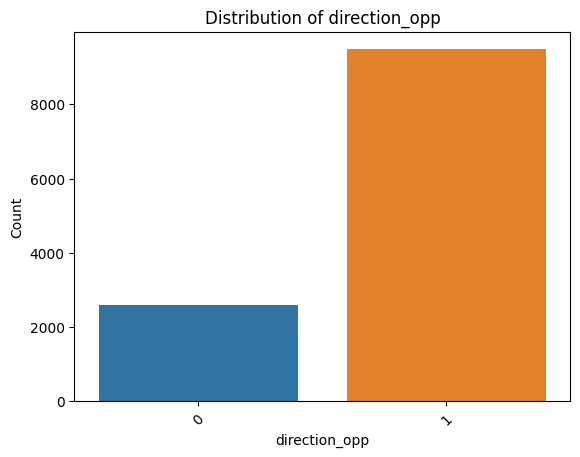

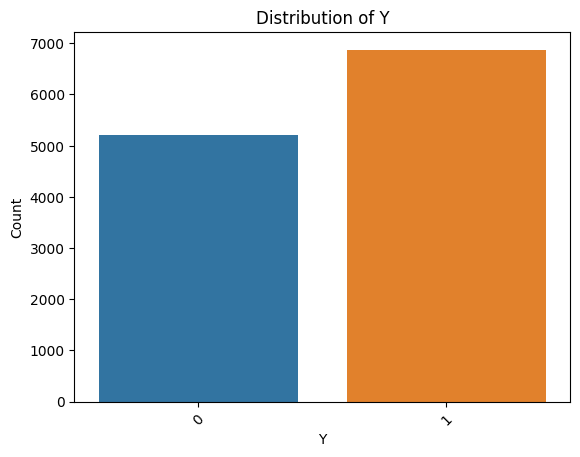

In [304]:
#Lets Visualize all other data columns
for column in data.columns:
    sns.countplot(x=column, data=data)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [306]:
bar_coupon_df= data[data['coupon'] =='Bar']
bar_coupon_df.head()
print(bar_coupon_df.shape)

(1913, 22)


2. What proportion of bar coupons were accepted?


In [308]:
total_bardf_count= bar_coupon_df.shape[0]
bar_accepted_coupon_count= bar_coupon_df['Y'].sum()
proportion_bar_accepted_coupons= bar_accepted_coupon_count/total_bardf_count
print(f'Proportion of Bar Coupons Accepted: {proportion_bar_accepted_coupons: .2f}')

Proportion of Bar Coupons Accepted:  0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [310]:
#Unqiue vallue for bar
bar_coupon_df['Bar'].value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [311]:
three_or_less_visits= bar_coupon_df[bar_coupon_df['Bar'].isin(['never','less1','1~3'])]
more_than_three_visits= bar_coupon_df[bar_coupon_df['Bar'].isin(['4~8','gt8'])]

acceptance_three_or_less= three_or_less_visits['Y'].mean()
acceptance_three_or_more= more_than_three_visits['Y'].mean()
print(f"Acceptance Rate for three or fewer visits {acceptance_three_or_less:.2F}")
print(f"Acceptance Rate for three or more visits {acceptance_three_or_more:.2F}")

Acceptance Rate for three or fewer visits 0.37
Acceptance Rate for three or more visits 0.76


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [313]:
one_or_more_over_25 = bar_coupon_df[(bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupon_df['age'] > '25')]
all_other = bar_coupon_df[~(bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupon_df['age'] > '25')]

acceptance_one_or_more_over_25 = one_or_more_over_25['Y'].mean()
acceptance_all_other = all_other['Y'].mean()


print(f"Acceptance Rate for drivers with 1 or more visit and who are >25 Years {acceptance_one_or_more_over_25:.2f}")
print(f"Acceptance Rate for all other drivers {acceptance_all_other:.2f}")


Acceptance Rate for drivers with 1 or more visit and who are >25 Years 0.68
Acceptance Rate for all other drivers 0.28


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [315]:
bar_coupon_df['passanger'].value_counts()
bar_coupon_df['occupation'].value_counts()
drivers_set_one = bar_coupon_df[(bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])) 
& (bar_coupon_df['passanger'] != 'Kid(s)') & (~bar_coupon_df['occupation'].isin(['Farming Fishing & Forestry']))]

drivers_set_two = bar_coupon_df[~(bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])) 
& (bar_coupon_df['passanger'] != 'Kid(s)') & (~bar_coupon_df['occupation'].isin(['Farming Fishing & Forestry']))]

acceptance_drivers_set_one = drivers_set_one['Y'].mean()
acceptance_rate_drivers_set_two = drivers_set_two['Y'].mean()


print(f"Acceptance Rate for drivers who go to bar more than once have no kid passesngers and have occupations other than farming, fishing or forestry {acceptance_drivers_set_one:.2f}")
print(f"Acceptance Rate for all other drivers {acceptance_rate_drivers_set_two:.2f}")

Acceptance Rate for drivers who go to bar more than once have no kid passesngers and have occupations other than farming, fishing or forestry 0.71
Acceptance Rate for all other drivers 0.31


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [317]:
scenario_one= bar_coupon_df[(bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupon_df['passanger'] != 'Kid(s)') &  (bar_coupon_df['maritalStatus'] != 'Widowed')] 

scenario_two = bar_coupon_df[(bar_coupon_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupon_df['age'] < '30') ]

scenario_three = bar_coupon_df[(bar_coupon_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) 
& (bar_coupon_df['income'] < '$50000') ]

acceptance_rate_scenario_one = scenario_one['Y'].mean()
acceptance_rate_scenario_two = scenario_two['Y'].mean()
acceptance_rate_scenario_three = scenario_three['Y'].mean()

print(f"Acceptance Rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {acceptance_rate_scenario_one:.2f}")
print(f"Acceptance Rate for drivers who go to bars more than once a month and are under the age of 30: {acceptance_rate_scenario_two:.2f}")
print(f"Acceptance Rate for drivers who go cheap restaurants more than 4 times a month and income is less than 50K: {acceptance_rate_scenario_three:.2f}")

Acceptance Rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.71
Acceptance Rate for drivers who go to bars more than once a month and are under the age of 30: 0.73
Acceptance Rate for drivers who go cheap restaurants more than 4 times a month and income is less than 50K: 0.46


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

1. People who visits bar more frequently are more likely to acccept coupon
2. Young people less than 25 are more likedly to accept coupons
3. Overall Bar coupons acceptance rate is 41%


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Create a new DataFrame that contains just the coffee coupons.

In [322]:
coffee_coupon_df= data[data['coupon'] =='Coffee House']
coffee_coupon_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,1,0


What proportion of coffee house coupons were accepted?

In [327]:
print(coffee_coupon_df.shape)
total_coffehouse_count= coffee_coupon_df.shape[0]
coffee_house_accepted_coupon_count= coffee_coupon_df['Y'].sum()
proportion_coffeehouse_accepted_coupons= coffee_house_accepted_coupon_count/total_coffehouse_count
print(f'Proportion of Coffee House Coupons Accepted: {proportion_coffeehouse_accepted_coupons: .2f}')

(3816, 22)
Proportion of Coffee House Coupons Accepted:  0.50


Compare the acceptance rate between those who went to a coffee house more than once with martial status as single compared to rest

In [330]:
coffee_coupon_df['CoffeeHouse'].value_counts()

CoffeeHouse
less1    1052
1~3      1019
never     896
4~8       507
gt8       342
Name: count, dtype: int64

In [332]:
coffee_house_more_once_single = coffee_coupon_df[(coffee_coupon_df['CoffeeHouse'].isin(['1~3', '4~8', 'gt8']) & coffee_coupon_df['maritalStatus'] == 'Single')]
all_other = coffee_coupon_df[~(coffee_coupon_df['CoffeeHouse'].isin(['1~3', '4~8', 'gt8']) & coffee_coupon_df['maritalStatus'] == 'Single')]

acceptance_coffee_house_more_once_single = coffee_house_more_once_single['Y'].mean()
acceptance_all_other = all_other['Y'].mean()


print(f"Acceptance Rate for  coffee house more than once with martial status as single {acceptance_coffee_house_more_once_single:.2f}")
print(f"Acceptance Rate for all other  {acceptance_all_other:.2f}")

Acceptance Rate for  coffee house more than once with martial status as single nan
Acceptance Rate for all other  0.50


Compare the acceptance rate between those who went to coffee house more than once when temperature is less than 80 and occupation is either Architecture & Engineering
or Computer & Mathematical or Business & Financial     

In [335]:
coffee_coupon_df['temperature'].value_counts()

temperature
80    2298
55    1219
30     299
Name: count, dtype: int64

In [337]:
coffee_coupon_df['occupation'].value_counts()

occupation
Unemployed                                   551
Student                                      475
Computer & Mathematical                      433
Sales & Related                              348
Education&Training&Library                   273
Management                                   271
Office & Administrative Support              192
Arts Design Entertainment Sports & Media     190
Retired                                      161
Business & Financial                         142
Food Preparation & Serving Related            77
Transportation & Material Moving              76
Healthcare Practitioners & Technical          71
Legal                                         69
Community & Social Services                   66
Healthcare Support                            65
Architecture & Engineering                    63
Life Physical Social Science                  61
Protective Service                            58
Construction & Extraction                     46
Installat

In [345]:
coffee_house_set_one = coffee_coupon_df[(coffee_coupon_df['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) 
& (coffee_coupon_df['temperature'] < 80) & (coffee_coupon_df['occupation'].isin(['Architecture & Engineering',
'Computer & Mathematical','Business & Financial']))]

coffee_house_set_two = coffee_coupon_df[~(coffee_coupon_df['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) 
& (coffee_coupon_df['temperature'] < 80) & (coffee_coupon_df['occupation'].isin(['Architecture & Engineering',
'Computer & Mathematical','Business & Financial']))]

acceptance_coffee_house_set_one = coffee_house_set_one['Y'].mean()
acceptance_coffee_house_set_two = coffee_house_set_two['Y'].mean()


print(f"Acceptance Rate for coffee house more than once when temperature is less than eighty and occupation is either Architecture engineering or Computer Mathematical or Business  Financial {acceptance_coffee_house_set_one:.2f}")
print(f"Acceptance Rate for all other  {acceptance_coffee_house_set_two:.2f}")

Acceptance Rate for coffee house more than once when temperature is less than eighty and occupation is either Architecture engineering or Computer Mathematical or Business  Financial 0.53
Acceptance Rate for all other  0.30


### Observations
1. Overall acceptance rate for Coffee house coupons is 50%
2. Acceptance is more than 50% when the temperature is less than 80 so its bit cooler and occupation is Architecture & Engineering',
'Computer & Mathematical','Business & Financial'
3. Acceptance is also lower in Singles which might not prefer to go for a coffee and want to go to Bar to socialize
